#                                                   PROJET ML

In [3]:
#importation des librairies
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline

In [4]:
#chargement du dataset : prédiction du prix des maisons en fonction des chambres
dataset = pd.read_csv('../ExerciceFinal/Melbourne_housing_FULL.csv', sep=',')

In [5]:
#affiché les infos des données
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

Nous constatons qu'il ya un problème avec les types de données. Par exemple, il n'y a aucune raison pour que le PostCode soit considéré comme un flottant alors qu'il s'agit clairement d'une catégorie. Je prendrai le temps de changer tous les types problématiques.
changer la salle de bain et la voiture en série entière
Le code postal est une variable catégorielle et non numérique
Yearbuilt doit être un entier
Propertycount est une catégorie

In [6]:
#afficher les premieres lignes du dataset
#On constate que les columns Price, BuildingArea, YearBuilt cotiennent beaucoup de valeur nul
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [7]:
#Transposer les colonnes en cellules pour avoir un affichage plus clair sur les données
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,34857,351,Reservoir,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,34857,34009,5 Charles St,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,34857,NaN,NaN,NaN,3.03101,0.969933,1,2,3,4,16
Type,34857,3,h,23980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,27247,NaN,NaN,NaN,1.05017e+06,641467,85000,635000,870000,1.295e+06,1.12e+07
Method,34857,9,S,19744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,34857,388,Jellis,3359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,34857,78,28/10/2017,1119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,34856,NaN,NaN,NaN,11.1849,6.78889,0,6.4,10.3,14,48.1
Postcode,34856,NaN,NaN,NaN,3116.06,109.024,3000,3051,3103,3156,3978


Il semble que notre ensemble de données comporte une tonne de valeurs manquantes, environ 75%. Voyons si nous pouvons nettoyer une partie de cela en supprimant les fonctionnalités inutiles remplissant certains NaN. Nous devrons également travailler avec nos dtypes, nous avons 8 instances de dtype = object que nous devrons corriger.

Caractéristiques descriptives :
  Suburb: Banlieue Adress: adresse 
  Rooms: Nombre de chambres 
  Type: Br - chambre (s); h - maison, chalet, villa, semi, terrasse; u - unité, duplex; t - maison de ville; site de   développement site de développement; o res - autre résidentiel.
  Price: Prix en dollars Method: S - propriété vendue; SP - propriété vendue auparavant; PI - propriété transmise; PN - vendu  auparavant non divulgué; SN - vendu non divulgué; NB - pas de soumission; VB - offre du fournisseur; W - retiré avant la vente aux enchères; SA - vendu après vente aux enchères; SS - vendu après le prix des enchères non divulgué. N / A - prix ou offre la plus élevée non disponible. 
  SellerG: Agent immobilier 
  Date: Date de vente 
  Distance: Distance du CBD 
  PostCode: Code postal 
  RegionName: Région générale (Ouest, Nord-Ouest, Nord, Nord-Est… etc.) 
  Propertycount: nombre de propriétés qui existent dans la banlieue.
  bedroom2: Nombre de chambres gratté (de source différente) 
  Bathroom: Nombre de salles de bain Car: nombre de places de stationnement
  Landsize: Taille du terrain 
  BuildingArea: Taille du bâtiment Année de construction: 
  YearBuilt	: année de construction de la maison    
  CouncilArea: Conseil d'administration de la région

### Partie 1 : Analyse graphique des données

### Nettoyage du dataset

In [8]:
#changeons le Postcode
dataset['Postcode']= dataset['Postcode'].astype('object')
#Changeons Propertycount en catégorie
dataset['Propertycount']= dataset['Propertycount'].astype('object')

Il semble que Bedroom2 soit très similaire à Rooms, nous pouvons le vérifions avec un simple nuage de points:

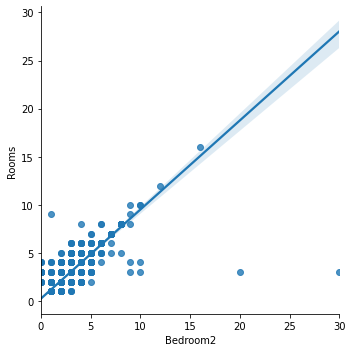

In [9]:
sns.lmplot(data= dataset, x='Bedroom2', y='Rooms')

Ainsi comme nous pouvons le voir ci-dessus, la relation est presque parfaitement linéaire, donc ils correspondent presque parfaitement. Ainsi la variable Bedroom2 ne fournit pas des informations supplémentaires que Rooms.

In [10]:
#drop Bedroom2
dataset= dataset.drop(['Bedroom2'], axis=1)

In [11]:
# verifions le nombre de bathrooms
dataset['Bathroom'].value_counts()

1.0     12969
2.0     11064
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
9.0         1
12.0        1
Name: Bathroom, dtype: int64

Il semblerait que 46 propriétés ne disposent pas de salle de bain! Je pense qu'il devrait s'agir de vieilles maisons avec une salle de bain commune à l'extérieur. Aussi, je trouve étrange qu'il y ait une propriété avec 12 salles de bains, même si je suppose que c'est techniquement possible. Jetons un coup d'œil aux maisons avec plus de 7 salles de bain.

In [12]:
dataset.loc[dataset.Bathroom>7].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2536,Burwood,36 Cumming St,3,h,NaN,PI,Ross,8/10/2016,11.7,3125,12.0,0.0,946.0,NaN,1950.0,Monash City Council,-37.85300,145.11290,Southern Metropolitan,5678
8251,Preston,421 Murray Rd,4,h,760000.0,PI,Barry,22/05/2016,8.8,3072,8.0,7.0,1254.0,280.0,1928.0,Darebin City Council,-37.73670,144.98950,Northern Metropolitan,14577
17472,Camberwell,1088 Toorak Rd,8,h,2200000.0,PI,Ross,8/07/2017,7.7,3124,8.0,4.0,650.0,NaN,NaN,Boroondara City Council,-37.84812,145.07414,Southern Metropolitan,8920
25717,Burwood,79 Elgar Rd,10,h,2315000.0,SP,Buxton,28/10/2017,10.4,3125,9.0,2.0,612.0,466.0,2015.0,Monash City Council,-37.84461,145.10968,Southern Metropolitan,5678
26210,Mitcham,20 Harrison St,16,h,5000000.0,S,Buxton,28/10/2017,17.2,3132,8.0,8.0,NaN,NaN,NaN,Whitehorse City Council,-37.81405,145.19891,Eastern Metropolitan,6871


In [13]:
#vérifions buildingArea 
dataset.loc[dataset.BuildingArea<1].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7211,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,4/03/2017,2.3,3051,1.0,1.0,215.0,0.00,2000.0,Melbourne City Council,-37.79530,144.94370,Northern Metropolitan,6821
16540,South Melbourne,148 Cobden St,3,h,NaN,S,Marshall,24/06/2017,1.9,3205,2.0,0.0,282.0,0.01,1920.0,Port Phillip City Council,-37.83658,144.96292,Southern Metropolitan,5943
19775,Balwyn North,14 Wanbrow Av,5,h,1950000.0,S,RT,3/09/2017,9.7,3104,3.0,2.0,743.0,0.00,1949.0,Boroondara City Council,-37.80235,145.09311,Southern Metropolitan,7809
19840,Bundoora,22 Moreton Cr,3,h,814000.0,S,Barry,3/09/2017,12.1,3083,1.0,2.0,542.0,0.00,1970.0,Banyule City Council,-37.70861,145.05691,Northern Metropolitan,10175
20038,Heidelberg Heights,8 Thames St,3,h,NaN,SN,Miles,3/09/2017,8.8,3081,1.0,2.0,658.0,0.00,1920.0,Banyule City Council,-37.75287,145.05547,Eastern Metropolitan,2947


In [14]:
dataset['BuildingArea'].loc[dataset.BuildingArea<1].count()

77

 il semble que 77 maisons n'ont pas de zone de construction, donc nous pouvons supprimer ces données.

In [15]:
dataset = dataset[~(dataset['BuildingArea'] < 1)]  
dataset['BuildingArea'].loc[dataset.BuildingArea<1].count()
#il est important maintenant de réinitialiser l'index, sinon on aura des lignes manquantes dans le dataset, ce qui peut être gênant plus tard.
dataset = dataset.reset_index()

In [16]:
#Verifions les valeurs manquantes
dataset.isnull().sum()

index                0
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7594
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8726
Landsize         11790
BuildingArea     21115
YearBuilt        19304
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [17]:
dataset['Price']= dataset['Price'].fillna(dataset['Price'].median())
dataset['Landsize']= dataset['Landsize'].fillna(dataset['Landsize'].median())
dataset['Distance'] = dataset['Distance'].fillna(dataset['Distance'].median())
dataset['BuildingArea']= dataset['BuildingArea'].fillna(dataset['BuildingArea'].median())
dataset['Lattitude']= dataset['Lattitude'].fillna(dataset['Lattitude'].median())
dataset['Longtitude']= dataset['Longtitude'].fillna(dataset['Longtitude'].median())
dataset['YearBuilt']= dataset['YearBuilt'].fillna(dataset['YearBuilt'].median())
dataset.isnull().sum()

index               0
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            1
Bathroom         8226
Car              8726
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         3
Lattitude           0
Longtitude          0
Regionname          3
Propertycount       3
dtype: int64

### Explorons les variables catégorielles

In [18]:
dataset['Bathroom']= dataset['Bathroom'].fillna(dataset['Bathroom'].mode()[0])
dataset['Car']= dataset['Car'].fillna(dataset['Car'].mode()[0])
dataset['CouncilArea']= dataset['CouncilArea'].fillna(dataset['CouncilArea'].mode()[0])
dataset['Regionname']= dataset['Regionname'].fillna(dataset['Regionname'].mode()[0])
dataset['Propertycount']= dataset['Propertycount'].fillna(dataset['Propertycount'].mode()[0])
dataset['Postcode']= dataset['Postcode'].fillna(dataset['Postcode'].mode()[0])
dataset.isnull().sum()

index            0
Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Après avoir supprimé des valeurs manquantes, je peux changer le type de salle de bain et de voiture en entier

In [19]:
dataset['Bathroom'] = pd.to_numeric(dataset['Bathroom']).round(0).astype(int)
dataset['Car'] = pd.to_numeric(dataset['Car']).round(0).astype(int)


Affichons maintenant la repartition les maisons les plus vendus selon le nombre de chambre

<AxesSubplot:ylabel='Rooms'>

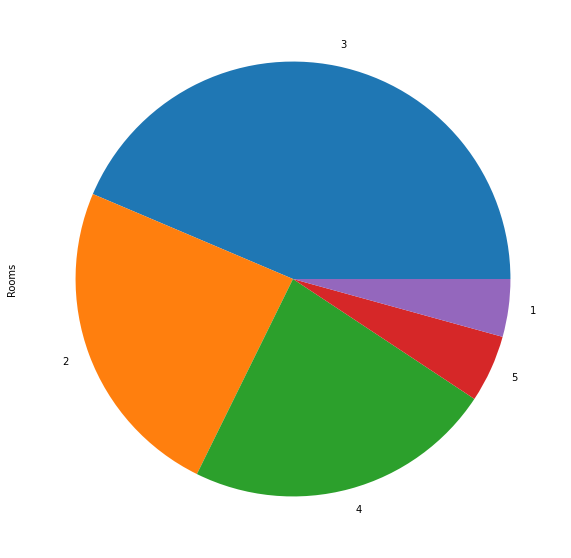

In [20]:
f, ax = plt.subplots(figsize=(10,10))
dataset.Rooms.value_counts().head().plot(kind ='pie')

On constat que les maisons ayant au moins 2 chambres sont les plus vendues

affichons maintenant la repartition des maisons selon le nombre de salle de bains

<AxesSubplot:ylabel='Bathroom'>

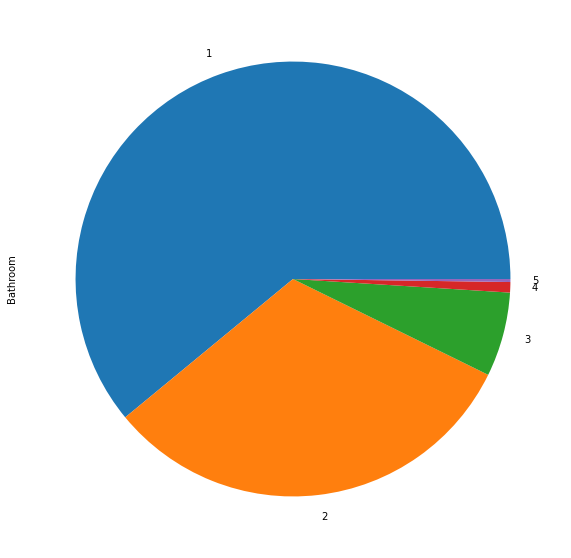

In [21]:
f, ax = plt.subplots(figsize=(10,10))
dataset.Bathroom.value_counts().head().plot(kind ='pie')

<AxesSubplot:ylabel='Regionname'>

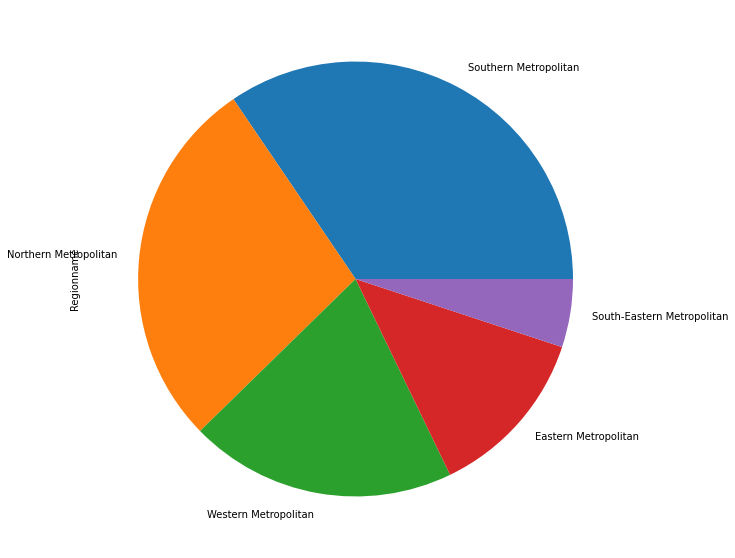

In [22]:
f, ax = plt.subplots(figsize=(10,10))
dataset.Regionname.value_counts().head().plot(kind ='pie')

On constate de les maisons dans le southern metropolitain sont celles qui sont le plus vendu

Maintenant vérifions avec des boxplots la distribution des valeurs ordinales et catégorielles

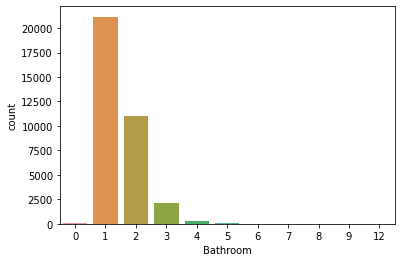

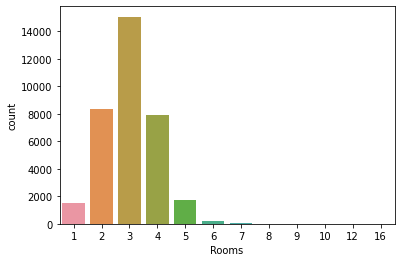

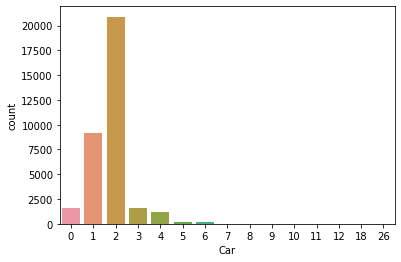

In [23]:
Cat= ['Bathroom', 'Rooms', 'Car']
for i in Cat:
    plt.figure()
    sns.countplot(x=i, data=dataset)

On constate que la plupart des maisons peuvent accueillir 2 voitures, elles ont entre 2 à 4 chambres et 1 ou 2 salles de bain;

### Explorons les variables continues

Observons la distribution des variables continues en utilisant des histogramme

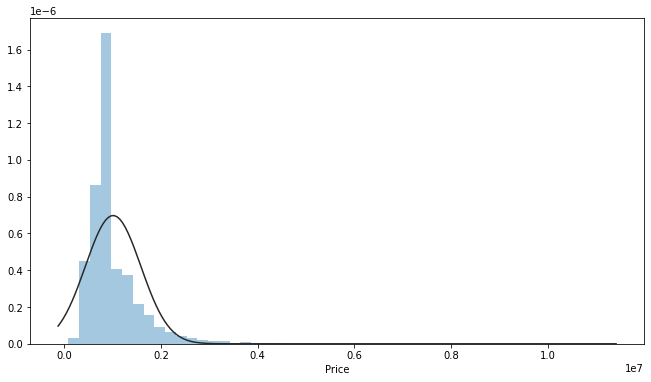

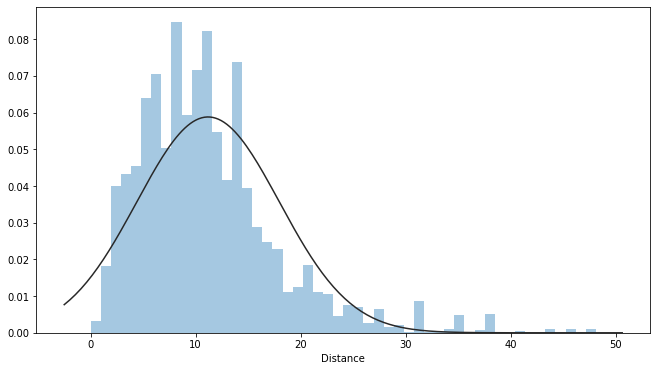

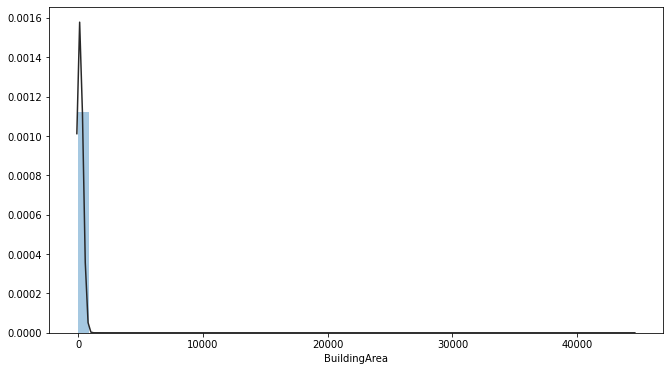

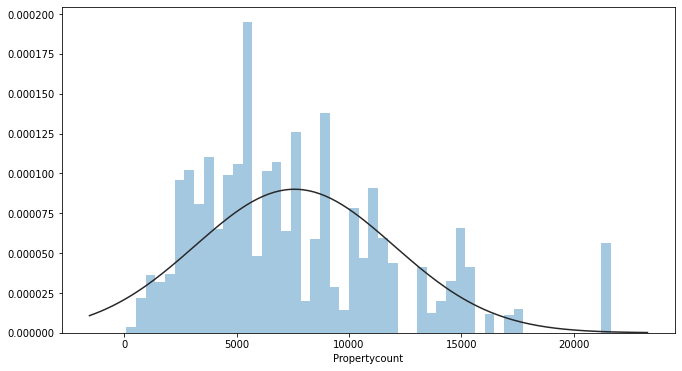

In [24]:
from scipy import stats
Cont= [dataset['Price'], dataset['Distance'], dataset['BuildingArea'], dataset['Propertycount']]
for i in Cont:
    plt.figure(figsize=(11,6))
    sns.distplot(i, fit=stats.norm, kde=False)

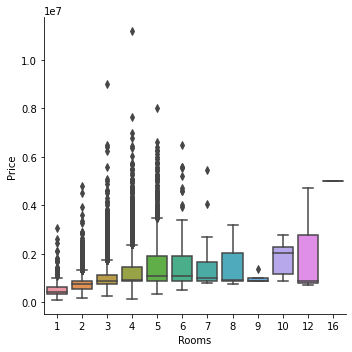

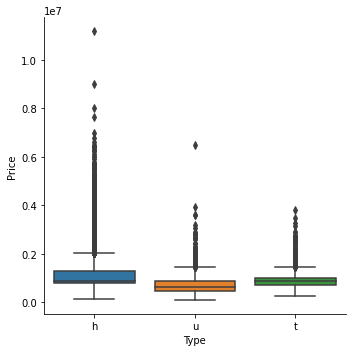

In [25]:
sns.catplot(x='Rooms', y= 'Price',kind='box', data=dataset, height=5)
sns.catplot(x='Type', y= 'Price',kind='box', data=dataset, height=5)

1)On constat qu'il y a une légère augmentation linéaire du prix pour plus de chambre.Aussi, tous les niveaux des pièces variables ne sont pas très stables, come les 9 et 16 chambres.
2)Le type de maison peut être un indicateur important du prix, car il semble que les types h coûtent plus cher et présentent une plus grande variabilité de prix.

Affichage de la heatmap avec les coefficients de la matrice de corrélation du dataset.

<AxesSubplot:>

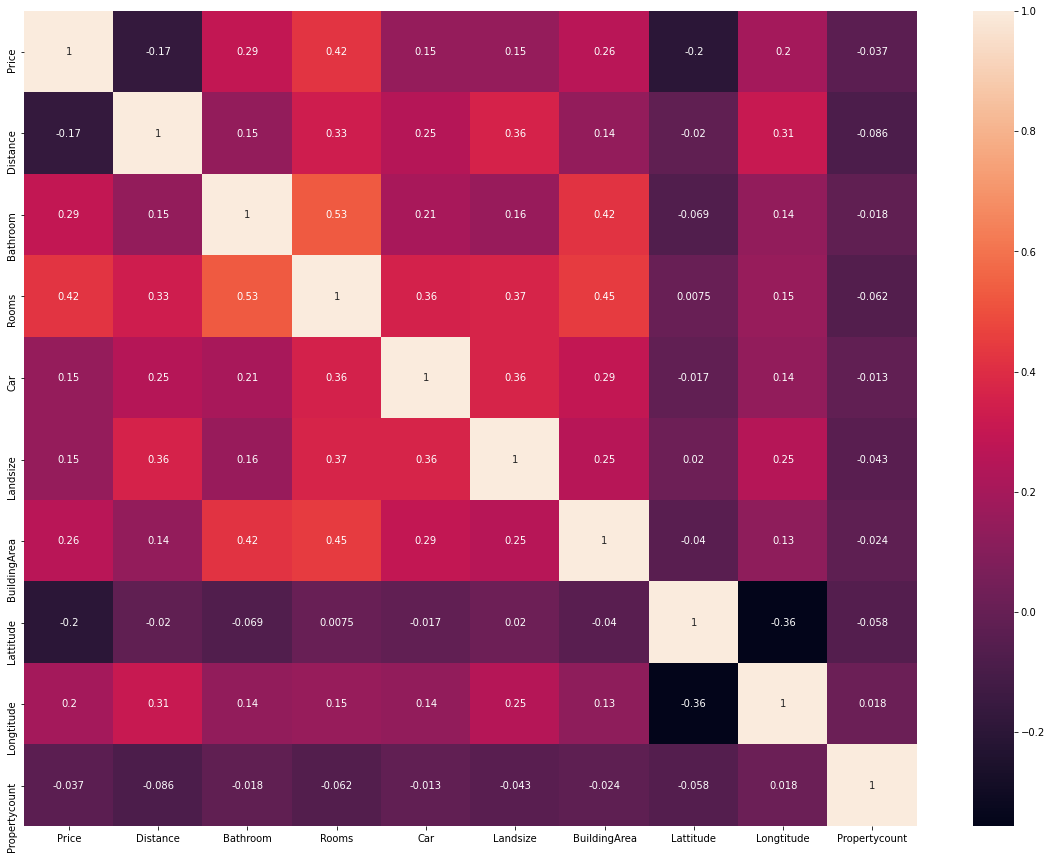

In [26]:
attributes= ['Price', 'Distance', 'Bathroom', 'Rooms', 'Car', 'Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'Propertycount']
housing= dataset[attributes]

#compute correlation matrix...
corr_matrix=housing.corr(method='spearman')
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)

On concut que Roms est la relation la plus forte (0,43).

On peut également réafficher le pairplot du début pour une meilleure visualisation.

<AxesSubplot:xlabel='Distance', ylabel='Price'>

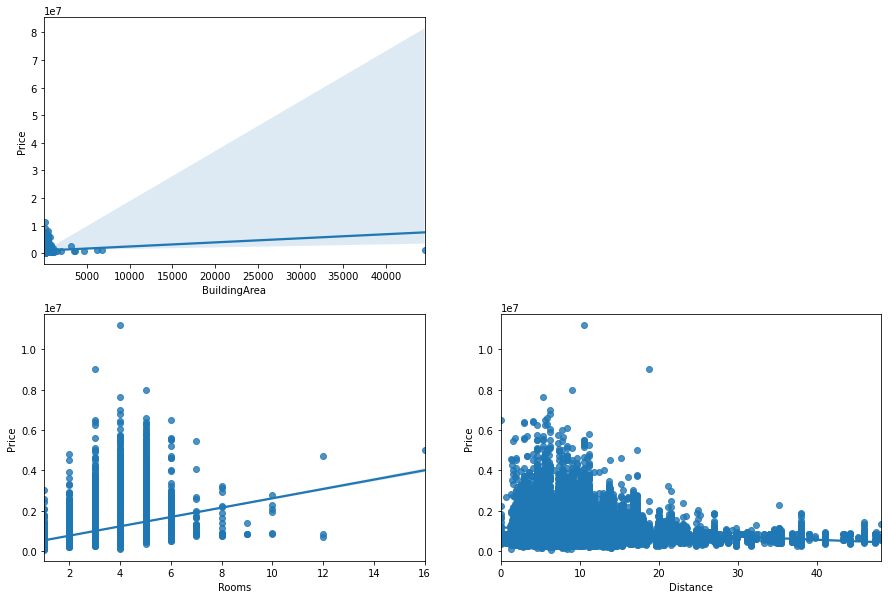

In [27]:
f, axes = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.regplot(data= dataset, x='BuildingArea', y='Price')
plt.subplot(223)
sns.regplot(data= dataset, x='Rooms', y='Price')
plt.subplot(224)
sns.regplot(data= dataset, x='Distance', y='Price')

Quel est le but du modèle?

Le but de notre modèle est de prédire le prix des maisons en fonction du type de maison et particulièrement vrai pour le type h.

Nous pouvons remarquer que le rang possède un coefficient négatif avec les ventes mondiales (devrait être positif puisque plus les ventes mondiales sont élevées plus le jeu vidéo est bien classé) mais comme le classement se fait de manière décroissante, c'est donc également inversé.

### Partie 2 : Model Building

### One-hot encoding pour les variables categoriques

In [28]:
from sklearn.preprocessing import LabelEncoder

encoder_genre = LabelEncoder().fit_transform(dataset['Price'].tolist())
dataset['Price'] = encoder_genre

encoder_platform = LabelEncoder().fit_transform(dataset['Rooms'].tolist())
dataset['Rooms'] = encoder_platform

dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34780 entries, 0 to 34779
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          34780 non-null  int64  
 1   Suburb         34780 non-null  object 
 2   Address        34780 non-null  object 
 3   Rooms          34780 non-null  int64  
 4   Type           34780 non-null  object 
 5   Price          34780 non-null  int64  
 6   Method         34780 non-null  object 
 7   SellerG        34780 non-null  object 
 8   Date           34780 non-null  object 
 9   Distance       34780 non-null  float64
 10  Postcode       34780 non-null  float64
 11  Bathroom       34780 non-null  int64  
 12  Car            34780 non-null  int64  
 13  Landsize       34780 non-null  float64
 14  BuildingArea   34780 non-null  float64
 15  YearBuilt      34780 non-null  float64
 16  CouncilArea    34780 non-null  object 
 17  Lattitude      34780 non-null  float64
 18  Longti

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,Abbotsford,68 Studley St,1,h,1155,SS,Jellis,3/09/2016,2.5,...,1,1,126.0,136.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,1,Abbotsford,85 Turner St,1,h,1960,S,Biggin,3/12/2016,2.5,...,1,1,202.0,136.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,2,Abbotsford,25 Bloomburg St,1,h,1427,S,Biggin,4/02/2016,2.5,...,1,0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,3,Abbotsford,18/659 Victoria St,2,u,1155,VB,Rounds,4/02/2016,2.5,...,2,1,0.0,136.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,4,Abbotsford,5 Charles St,2,h,1945,SP,Biggin,4/03/2017,2.5,...,2,0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Définissons les variables X et Y et Splittons ces variables en données d'entraînement et de test.

In [29]:
dataset_cr = dataset.dropna().sort_values("Date")

In [30]:
suburb_dummies = pd.get_dummies(dataset_cr[["Type", "Method"]])

In [31]:
all_Data = dataset_cr.drop(["Address","Price","Date", "SellerG","Suburb","Type","Method","CouncilArea","Regionname"],axis=1).join(suburb_dummies)

In [32]:
#Définissons les variables X et Y
y = dataset_cr['Price']
X = all_Data
print(X.shape)
print(y.shape)

(34780, 24)
(34780,)


In [33]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (24346, 24)
y_train shape: (24346,)
X_test shape: (10434, 24)
y_test shape: (10434,)


### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lin_reg  = LinearRegression()
lin_reg.fit(X_train, y_train)

print('Coefficients beta_j: \n', lin_reg .coef_)
print('Coefficients intercept beta_0: \n', lin_reg .intercept_)

y_pred = lin_reg .predict(X_train)
y_test_pred = lin_reg .predict(X_test)
print("taille du vecteur Y_pred : ", y_pred.size)
print("taille du vecteur Y_test_pred : ", y_test_pred.size)

print("Mean squared error : Train = %.3f, Test = %.3f" % (
        mean_squared_error(y_train, y_pred),
        mean_squared_error(y_test, y_test_pred)))
print("R2 : Train = %.3f, Test = %.3f" % (
        r2_score(y_train, y_pred),
        r2_score(y_test, y_test_pred)))

Coefficients beta_j: 
 [ 8.30005512e-04  1.90051841e+02 -4.10275393e+01  6.35317417e-01
  6.78465121e+01  3.52539453e+01  4.12949444e-03  5.52419405e-02
 -1.91279047e+00 -1.32413173e+03  7.85681764e+02 -5.33854814e-03
  2.11266864e+02  5.63759773e+01 -2.67642841e+02  1.99640229e+01
 -3.89334730e+00  4.42832019e+01  1.93545240e+01 -1.00454430e+02
 -8.53372665e+01 -8.23972693e+01  5.32936457e+01  1.35186919e+02]
Coefficients intercept beta_0: 
 -161173.3794326575
taille du vecteur Y_pred :  24346
taille du vecteur Y_test_pred :  10434
Mean squared error : Train = 190221.013, Test = 188815.326
R2 : Train = 0.483, Test = 0.475


In [56]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=4)),('slr', LinearRegression())])

train_score = []

n = 45
for i in range(n):
    warnings.warn(
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=i)
        y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
        train_score = np.append(train_score, np.mean(cross_val_score(pipe_lr, X_train, y_train_std, scoring ='r2' , cv = 10)))
        train_score = np.append(train_score, r2_score(y_train, y_train_pred))
        test_score = np.append(test_score, r2_score(y_test, y_test_pred)))

SyntaxError: invalid syntax (<ipython-input-56-fc992e175cb2>, line 16)

In [55]:
print(train_score)
print(test_score)

NameError: name 'train_score' is not defined

In [115]:
print("Meilleur score en Train :", max(train_score),"avec un random_state =", np.argmax(train_score))
print("Meilleur score en Test :", max(test_score),"avec un random_state =", np.argmax(test_score))

print('R2 train: %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('R2 test: %.3f +/- %.3f' % (np.mean(test_score),np.std(test_score)))

Meilleur score en Train : 0.25387380237559765 avec un random_state = 1
Meilleur score en Test : 0.2555736612183135 avec un random_state = 0
R2 train: 0.208 +/- 0.046
R2 test: 0.183 +/- 0.083


### Partie 3 : Features Importance

[-1.34469471e-02  1.86440599e+02 -4.08482883e+01  6.20619497e-01
  6.92161028e+01  3.32476432e+01  3.90520728e-03  5.50569414e-02
 -1.90384773e+00 -1.29821064e+03  7.66785065e+02 -5.06503278e-03
  2.10852434e+02  5.37478186e+01 -2.64600253e+02  2.03605023e+01
  3.40928140e-01  4.22416255e+01  1.32620125e+01 -9.88045986e+01
 -8.68798968e+01 -8.48861126e+01  5.02945046e+01  1.44071035e+02
 -4.78512895e+01  1.54661659e+02  1.72806937e+02 -1.29164590e+02
 -9.22453031e+01 -1.06128225e+02 -7.02016455e+01  1.44653741e+02
 -1.86899982e+02  1.38843503e+02 -1.20156525e+02  1.09276338e+01
 -1.80292234e+02 -2.13424182e+02  1.56262424e+02 -5.02853313e+00
 -1.02475422e+02 -1.96415363e+02 -1.44273947e+02  1.12424829e+02
  2.48706999e+02  2.86864832e+02  5.11575255e+01 -8.77203907e+01
 -7.23871021e+01 -1.86554398e+02  2.18777780e+02  1.37601794e+02
 -9.79006538e+01  3.90493293e+02  2.23725936e+01  1.69328798e+02
 -2.93953077e+01 -2.07304020e+02  3.14192264e+01 -1.53537432e+02
 -2.02704542e+02  1.08299

<BarContainer object of 102 artists>

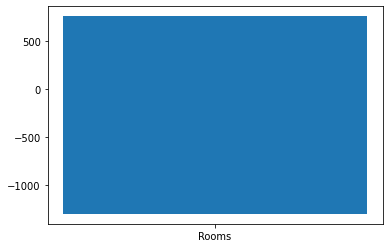

In [163]:
dataset_feat = ['Rooms']
print(lin_reg.coef_)
plt.bar(dataset_feat, regr.coef_)

### Partie  4 - Réexécution avec les features sélectionnés

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(y_test.shape))

X_train shape: (24346, 102)
Y_train shape: (24346,)
X_test shape: (10434, 102)
Y_test shape: (10434,)


In [156]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print('Coefficients beta_j: \n', linear_reg.coef_)
print('Coefficients intercept beta_0: \n', linear_reg.intercept_)

y_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)
print("taille du vecteur Y_pred : ", y_pred.size)
print("taille du vecteur Y_test_pred : ", y_test_pred.size)

print("Mean squared error : Train = %.3f, Test = %.3f" % (
        mean_squared_error(y_train, y_pred),
        mean_squared_error(y_test, y_test_pred)))
print("R2 : Train = %.3f, Test = %.3f" % (
        r2_score(y_train, y_pred),
        r2_score(y_test, y_test_pred)))

Coefficients beta_j: 
 [-1.27673014e-02  1.87617964e+02 -4.04638348e+01  6.46507693e-01
  5.94921269e+01  3.01813192e+01  5.20504930e-03  2.41766678e-01
 -1.81995889e+00 -1.27470331e+03  7.54450649e+02 -5.11690665e-03
  2.08112224e+02  5.57590049e+01 -2.63871229e+02  2.54812499e+00
  1.84750623e+01  3.08235771e+01  1.41573803e+01 -1.15735088e+02
 -9.59047696e+01 -5.13492083e+01  3.22877839e+01  1.64697138e+02
 -4.54746038e+01  1.30694895e+02  1.23825095e+02 -1.41960032e+02
 -8.38962261e+01 -1.03722909e+02 -8.95934893e+01  1.42719955e+02
 -1.45221912e+02  1.26492369e+02 -1.13963721e+02  9.15100273e+00
 -1.47026487e+02 -2.17345628e+02  1.71872953e+02 -1.73739771e+01
 -8.95615359e+01 -1.59660705e+02 -1.56725021e+02  1.11373361e+02
  2.47156348e+02  2.63538439e+02  5.32819444e+01 -5.74410544e+01
 -5.37435145e+01 -1.73794226e+02  2.01711673e+02  1.07598996e+02
 -7.81604534e+01  3.69700432e+02  1.79183345e+01  1.56665048e+02
  2.43111480e+01 -1.82449525e+02  4.86102515e+01 -1.16282606e+02
 -

In [157]:
print("Meilleur score en Train :", max(train_score),"avec un random_state =", np.argmax(train_score))
print("Meilleur score en Test :", max(test_score),"avec un random_state =", np.argmax(test_score))

print('R2 train: %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('R2 test: %.3f +/- %.3f' % (np.mean(test_score),np.std(test_score)))

Meilleur score en Train : 0.25387380237559765 avec un random_state = 1
Meilleur score en Test : 0.2555736612183135 avec un random_state = 0
R2 train: 0.208 +/- 0.046
R2 test: 0.183 +/- 0.083


On constat que les performances du test n'augmentent plus, tandis que le train cesse d'augmenter. Cela signifie que les performances du meilleur modèle pourraient encore être améliorées si Random_state était un peu diminué ... du moins avec ce jeu de test!